# Testing Addicted Q Agent

In [33]:
%load_ext autoreload
%autoreload 2

from q_addicted import Addicted_Q_Agent
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Basic Configurations

In [34]:
CONFIGS = {
    'alpha': 0.1,
    'gamma': 0.9,
    'epsilon': 0.1,
    'num_trials': 100,
    'num_states': 10,
    'num_actions': 3,
    'initial_dopamine_surge': 1,
    'dopamine_decay_rate': 0.99,
    'reward_states': [0, 5, 10],
    'drug_reward': 1,
    'addicted': True
}

# Addicted Agent Learning

In [35]:
agent_epsilon_greedy = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted']
)

agent_boltzmann_exploration = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted'],
    exploration_strategy = 'boltzmann_exploration'
)

rpe, Q_across_trials = agent_epsilon_greedy.learning()
rpe_2, Q_across_trials_2 = agent_boltzmann_exploration.learning()

### Heatmap comparison for different actions using Q and rpe

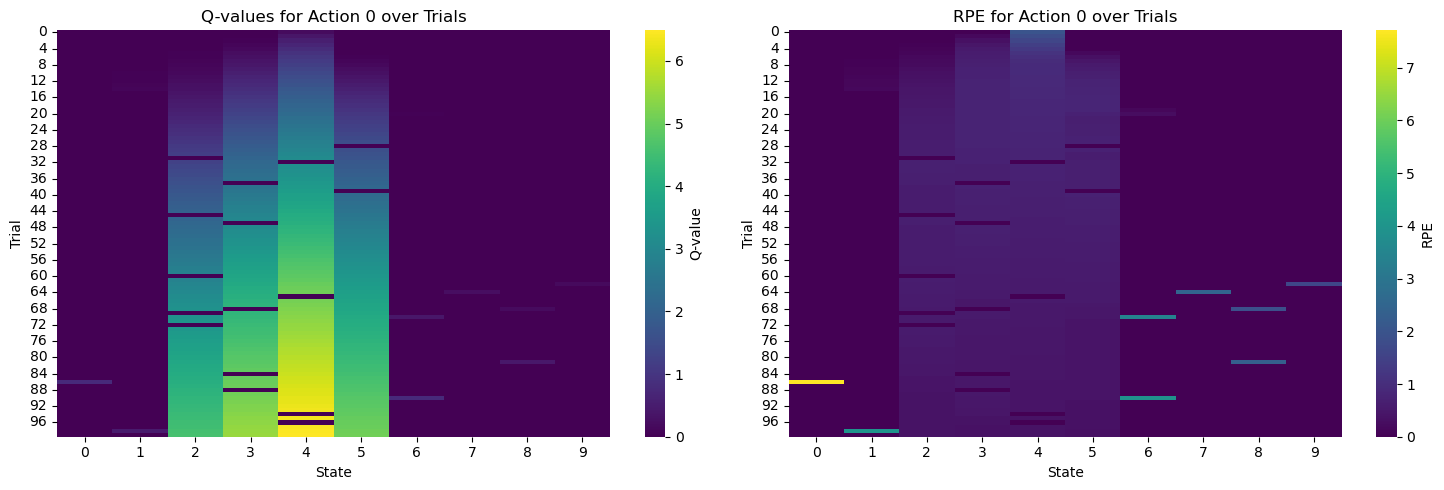

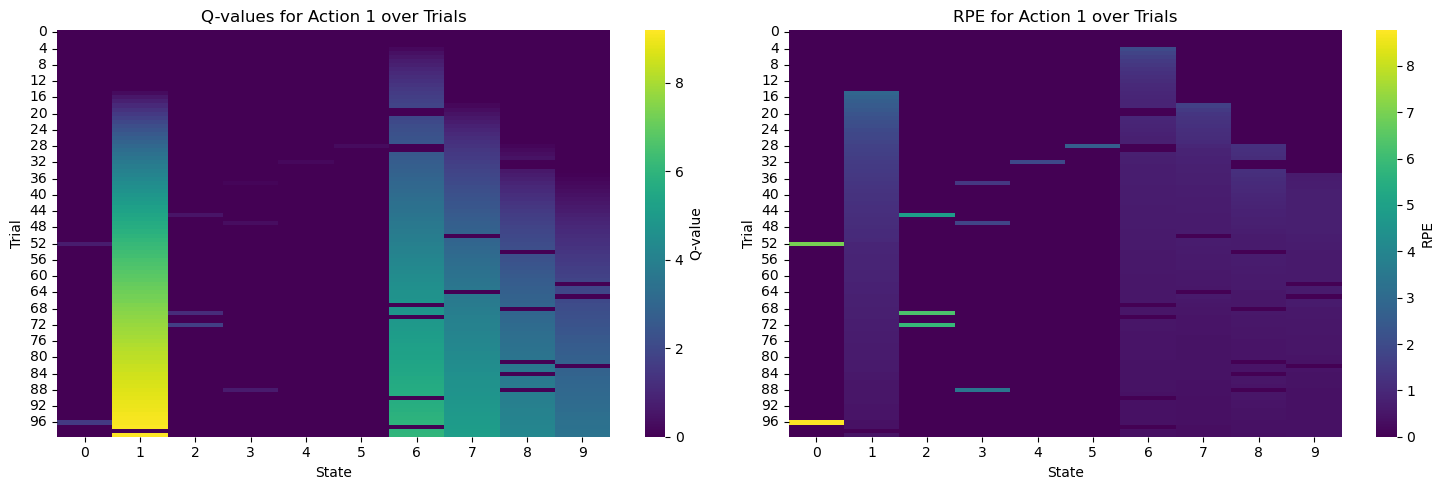

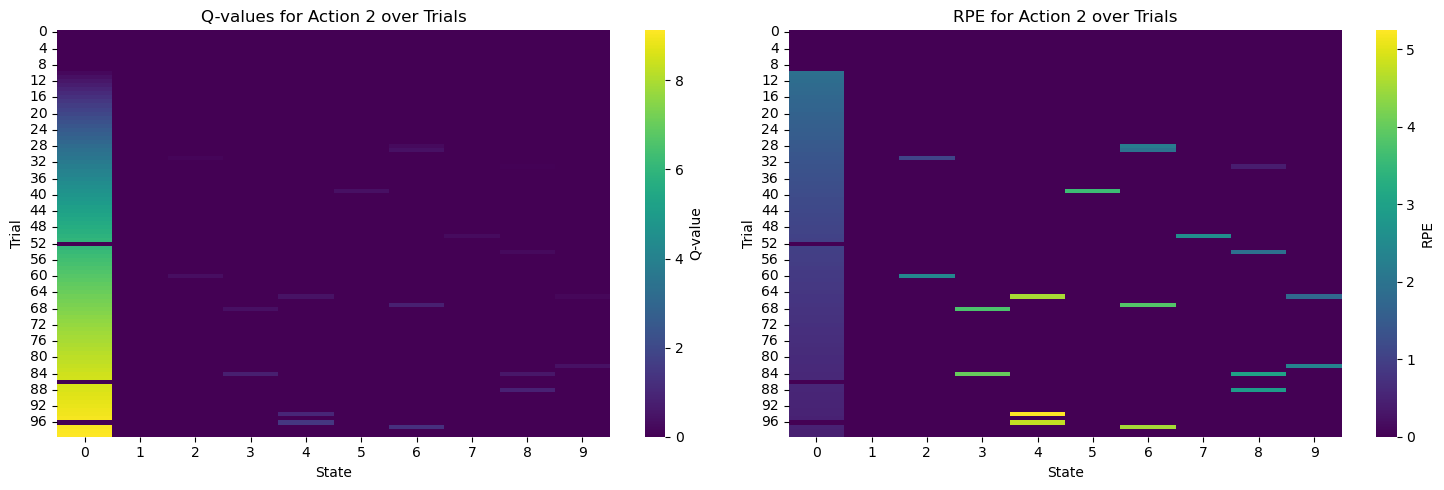

In [36]:
plot_heatmap(Q_across_trials, rpe)

seems like leading to state 5, and remain at state 5, proporgate backward starts even from the 9th state when the 10th state is also a addicted state.

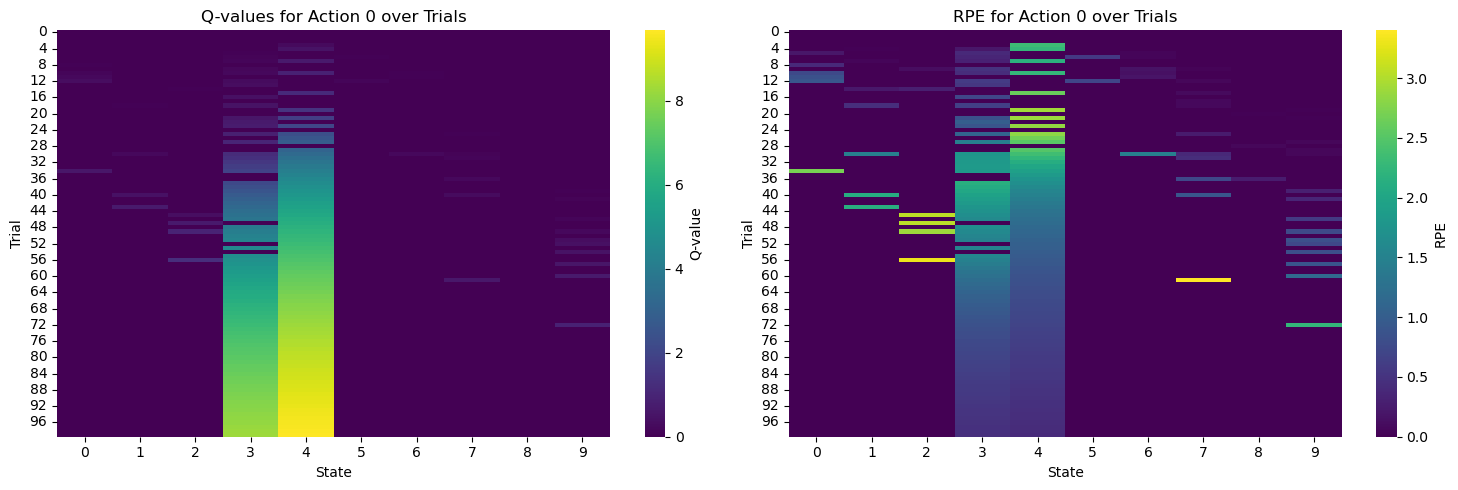

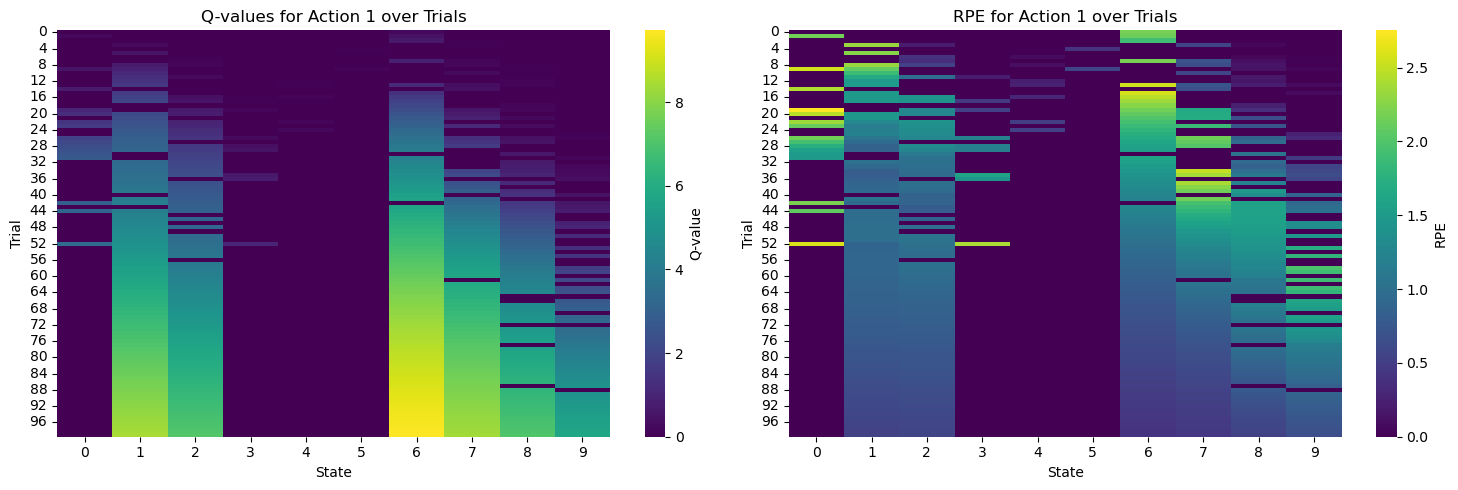

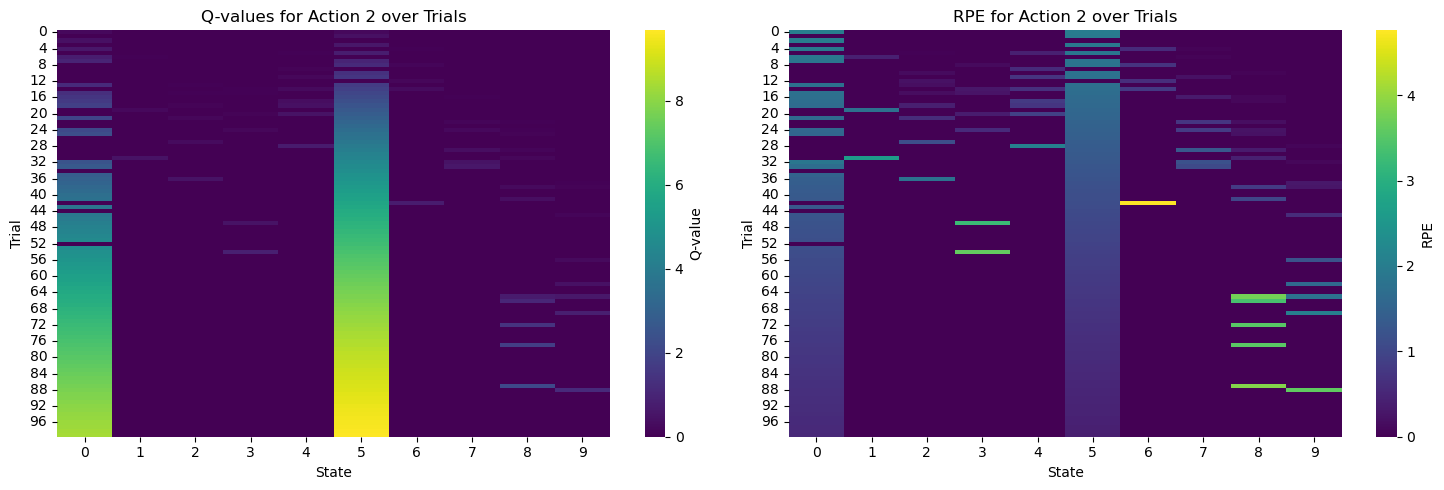

In [37]:
plot_heatmap(Q_across_trials_2, rpe_2)

Similar trend in the boltzmann_exploration agent.

# Stochastic process comparison (random walk) for average visit time

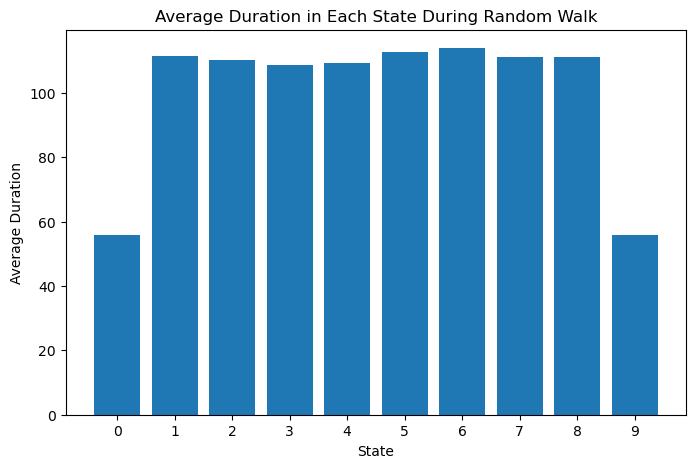

In [38]:
num_trials = 100
num_steps = 1000
avg_durations = agent_epsilon_greedy.random_walk(num_trials, num_steps)

plt.figure(figsize=(8, 5))
plt.bar(range(CONFIGS['num_states']), avg_durations)
plt.title('Average Duration in Each State During Random Walk')
plt.xlabel('State')
plt.ylabel('Average Duration')
plt.xticks(range(CONFIGS['num_states']))
plt.show()

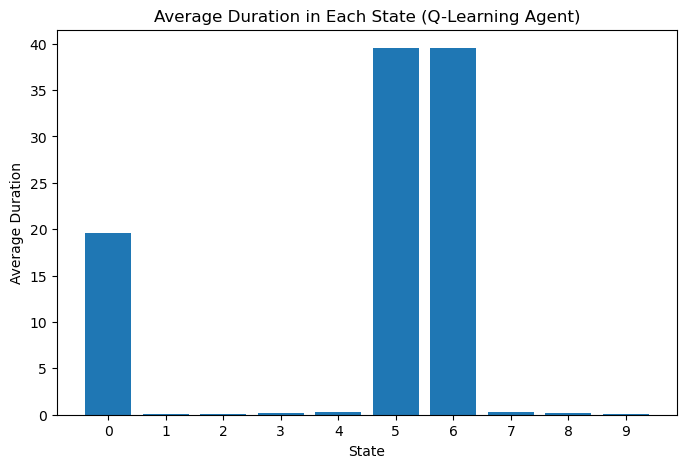

In [39]:
num_re_trials = 10000
max_action_per_trial = 100
avg_durations = agent_epsilon_greedy.resimulate_state_durations(num_re_trials, max_action_per_trial)

plt.figure(figsize=(8, 5))
plt.bar(range(CONFIGS['num_states']), avg_durations)
plt.title('Average Duration in Each State (Q-Learning Agent)')
plt.xlabel('State')
plt.ylabel('Average Duration')
plt.xticks(range(CONFIGS['num_states']))
plt.show()

# Coomparison of different search strategy

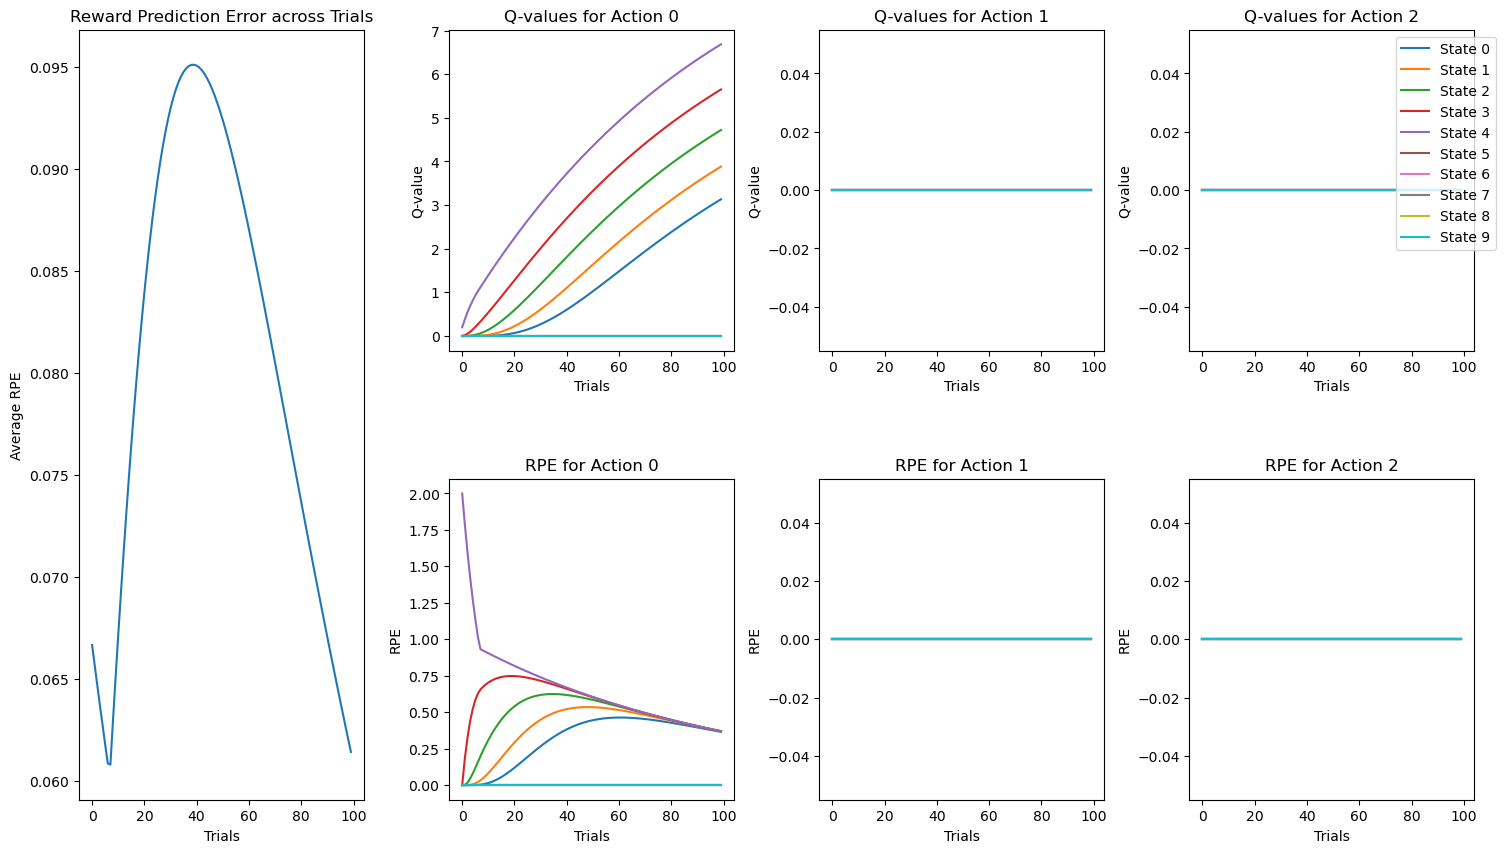

In [40]:
exploration_strategy = 'greedy'

agent = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted'],
    exploration_strategy
)

rpe, Q_across_trials = agent.learning()
plot_results(rpe, Q_across_trials)

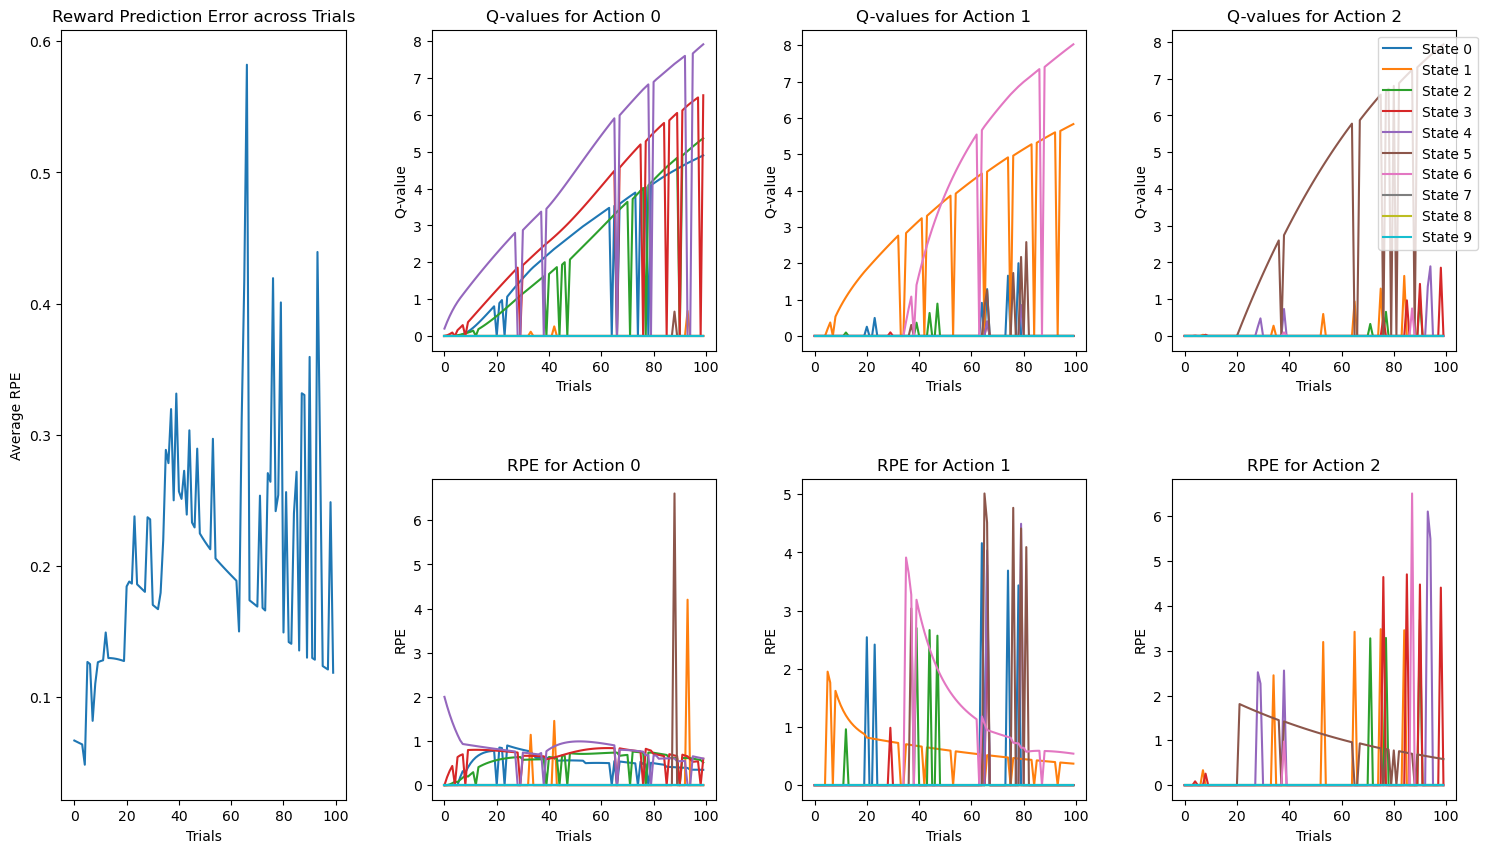

In [41]:
exploration_strategy = 'epsilon_greedy'

agent = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted'],
    exploration_strategy
)

rpe, Q_across_trials = agent.learning()
plot_results(rpe, Q_across_trials)

### Boltzmann Exploration

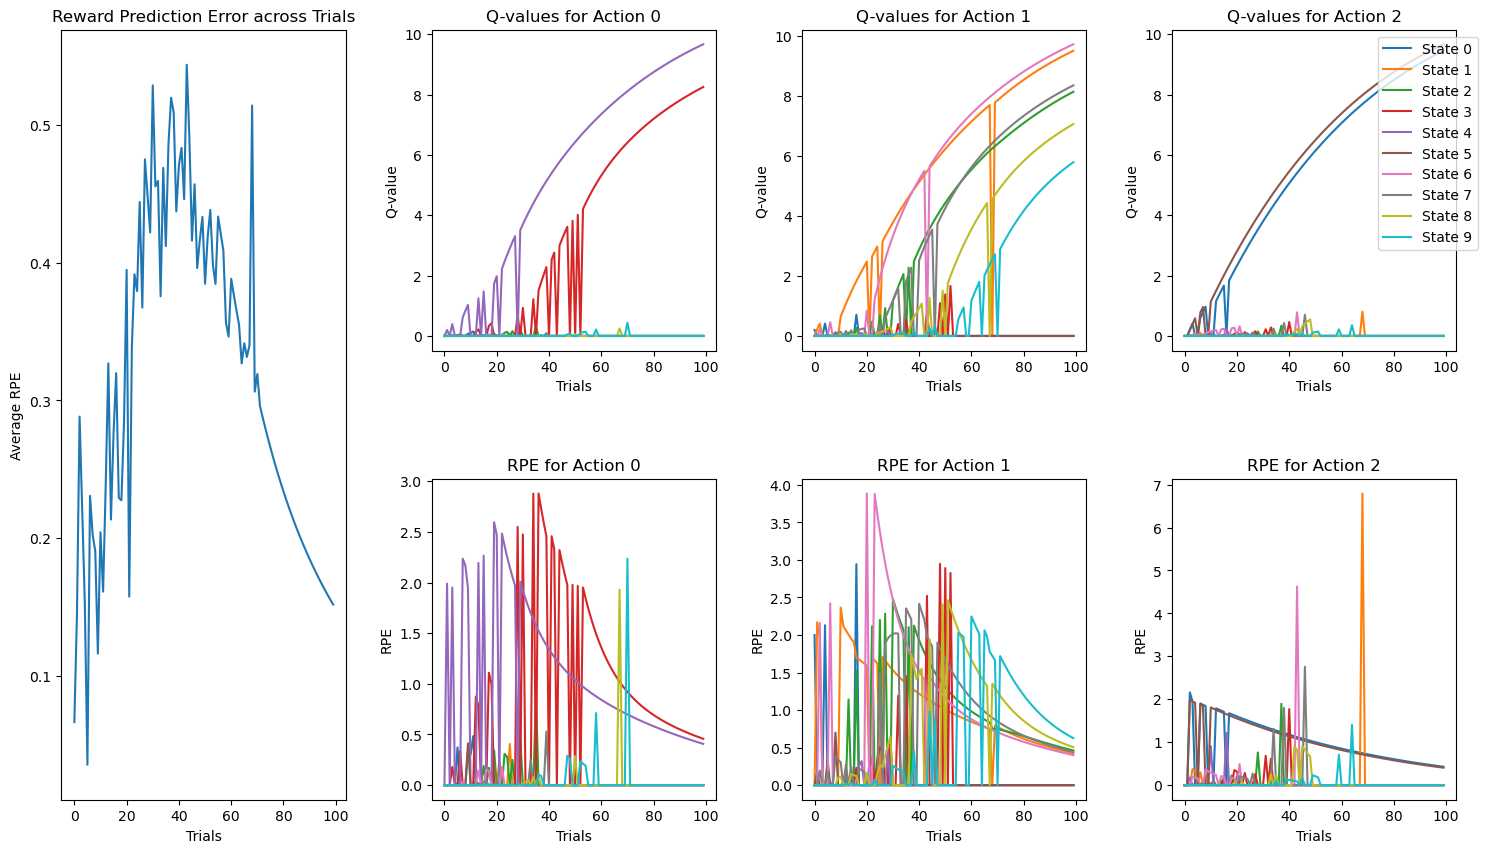

In [42]:
exploration_strategy = 'boltzmann_exploration'

agent = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted'],
    exploration_strategy
)
rpe, Q_across_trials = agent.learning()
plot_results(rpe, Q_across_trials)